__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 21, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 27: Fourier series</font></center>



## <font color=#46769B>Introduction</font>


The goals of this exercise are:
- Introduction to Fourier series

Required reading:
- *Lesson 12: Fourier series*




## <font color=#46769B>Exercise: Part (a) </font>

Consider a __driven damped harmonic oscillator__, with a driving function $F(t)$, governed by the second-order ODE

$$y''(t) + \gamma y'(t) + \omega_0^2 y(t) = F(t) \, , \qquad (1)$$

where $\omega_0$ is the intrinsic angular frequency of the oscillator and $\gamma$ is the damping coefficient. The oscillator is initially at rest at $t=0$, with initial condition

$$y(0) = 0 , \quad y'(0) = 0 \, .$$

We will consider a driving function that "turns on" for $t \ge 0$ and is given by a periodic triangular wave, shown here, with period $T=1$:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/triangular_wave.PNG" width="400">
</div>

The functional form of the wave is to be determined by you from this plot. Assume that $F(t)$ is linear except at its minima and maxima, and that it repeats henceforth for $t > 0$.

The goal of this exercise is to consider the response of the system, i.e., what is $y(t)$, for the driving function $F(t)$. Perform the following task:
- Define a function `F(t)` as a piecewise function to implement $F(t)$ according to the plot shown.
- Write a code that will solve Eq. (1) numerically, setting $\omega_0 = 0.6$, $\gamma=0.2$. The method, time interval, number of steps are up to you, but you must ensure that your results have converged at some level.  Solve for $y(t)$ for $t$ in the range $[0,20]$.





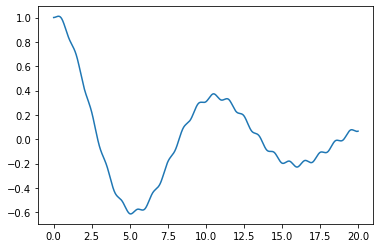

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

T = 1 
def triangle_wave(t):
  if (t>=0) & (t < T/2):
    return -4*t+1
  elif (T/2<=t) & (t<T):
    return 4*t-3
  elif t<0: 
    return triangle_wave(t+T)
  else:
    return triangle_wave(t-T)


y0 = 1 
num_steps = 1000
omega0 = 0.6 
gamma = 0.2 
t0, tf = 0, 20
# solve with rk4 

def f(t,y):
  y1, y2 = y 
  F = np.vectorize(triangle_wave)
  return np.array([y2, F(t)-gamma*y2-omega0**2*y1])

def rk4(num_steps,y0):

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1]-t[0]

  y = np.zeros((num_steps+1,2))
  y0 = np.array([y0,0])
  y[0] = y0 

  for i in range(num_steps):
    ti = t[i] 
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti + h/2, yi + (h/2)*k1)
    k3 = f(ti + h/2, yi + (h/2)*k2)
    k4 = f(ti + h, yi + h*k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6 
    y[i+1] = yi + h*k
  return t, y  

not_converged_yet = True
num_steps = 1000

t_old, y_old = rk4(num_steps,y0)

while not_converged_yet:
  num_steps = 2*num_steps
  t_new, y_new = rk4(num_steps,y0)
  not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
  y_old = y_new

y = y_new[:,0]
t = t_new 

plt.plot(t,y)
plt.show()

## <font color=#46769B>Exercise: Part (b) </font>

The Fourier coefficients for $F(t)$ are:

$$a_0 = 0 \, , \quad a_n = \left\{ \begin{array}{cc} \frac{8}{\pi^2 n^2} & {\rm for\; odd} \; n > 0 \\ 0 & {\rm for\; even} \; n > 0 \end{array} \right. , \quad b_n = 0 \, .$$

Perform the following tasks:
- With these Fourier coefficients, make a plot of the Fourier series for $F(t)$ vs $t$ for $t$ in the range $[0,2]$, truncating at $n_{\rm max} = 3$ and $n_{\rm max} = 15$. Show also your $F(t)$ from Part (a) on the same plot.

- Combining your Fourier series for $F(t)$ and your results from Exercise 26, code up and plot an analytic solution for $y(t)$ for both $n_{\rm max} = 3$ and $n_{\rm max} = 15$. Compare on the same plot your solution for $y(t)$ from Part (a).

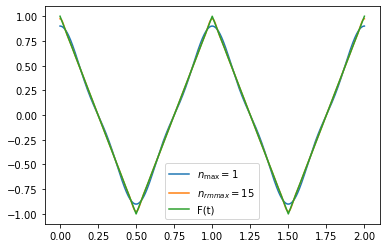

In [2]:
t0 = 0
tf = 2 
t = np.linspace(t0,tf,num=num_steps+1)
def fourier_series(t,n_max):

  a0 = 0 

  f = a0

  for n in range(1,n_max+1,2):
    an = 8 / (np.pi**2 * n**2) 
    bn = 0 
    f = f + an*np.cos(2*np.pi*n*t/T) + bn*np.sin(2*np.pi*n*t/T)

  return f 
F = np.vectorize(triangle_wave)
plt.plot(t,fourier_series(t,3),label=r'$n_{\rm max}=1$')
plt.plot(t,fourier_series(t,15),label=r'$n_{rm max}=15$')
plt.plot(t,F(t),label='F(t)')
plt.legend()
plt.show()
